In [1]:
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import numpy
import iris.coord_categorisation
import re

In [2]:
%matplotlib inline

In [3]:
infile = '/g/data/ua6/DRSv2/CMIP5/CSIRO-Mk3-6-0/rcp85/mon/ocean/r1i1p1/tauuo/latest/tauuo_Omon_CSIRO-Mk3-6-0_rcp85_r1i1p1_200601-210012.nc'

In [4]:
cube = iris.load_cube(infile, 'surface_downward_x_stress')

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [5]:
print(cube)

surface_downward_x_stress / (N m-2) (time: 1140; latitude: 189; longitude: 192)
     Dimension coordinates:
          time                           x               -               -
          latitude                       -               x               -
          longitude                      -               -               x
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time: 56940.0
          cmor_version: 2.6.0
          comment: Data is stored on the native atmosphere grid on which the data was generated....
          contact: Project leaders: Stephen Jeffrey (Stephen.Jeffrey@qld.gov.au) & Leon Rotstayn...
          creation_date: 2011-08-10T00:12:17Z
          experiment: RCP8.5
          experiment_id: rcp85
          forcing: Ant,Nat (RCP 8.5)
          frequency: mon
          history: 2011-08-10T00:12:17Z altered by CMOR: replaced missing value flag (-7.

In [6]:
def get_time_constraint(time_list):
    """Get the time constraint used for reading an iris cube."""
    
    if time_list:

        start_date, end_date = time_list

        date_pattern = '([0-9]{4})-([0-9]{1,2})-([0-9]{1,2})'
        assert re.search(date_pattern, start_date)
        assert re.search(date_pattern, end_date)

        if (start_date == end_date):
            year, month, day = start_date.split('-')    
            time_constraint = iris.Constraint(time=iris.time.PartialDateTime(year=int(year), month=int(month), day=int(day)))
        else:  
            start_year, start_month, start_day = start_date.split('-') 
            end_year, end_month, end_day = end_date.split('-')
            time_constraint = iris.Constraint(time=lambda t: iris.time.PartialDateTime(year=int(start_year), month=int(start_month), day=int(start_day)) <= t.point <= iris.time.PartialDateTime(year=int(end_year), month=int(end_month), day=int(end_day)))
    else:
        time_constraint = iris.Constraint()

    return time_constraint

In [7]:
with iris.FUTURE.context(cell_datetime_objects=True):
    start_cube = cube.extract(get_time_constraint(['2006-01-01', '2025-12-31']))
    start_clim = start_cube.collapsed('time', iris.analysis.MEAN)

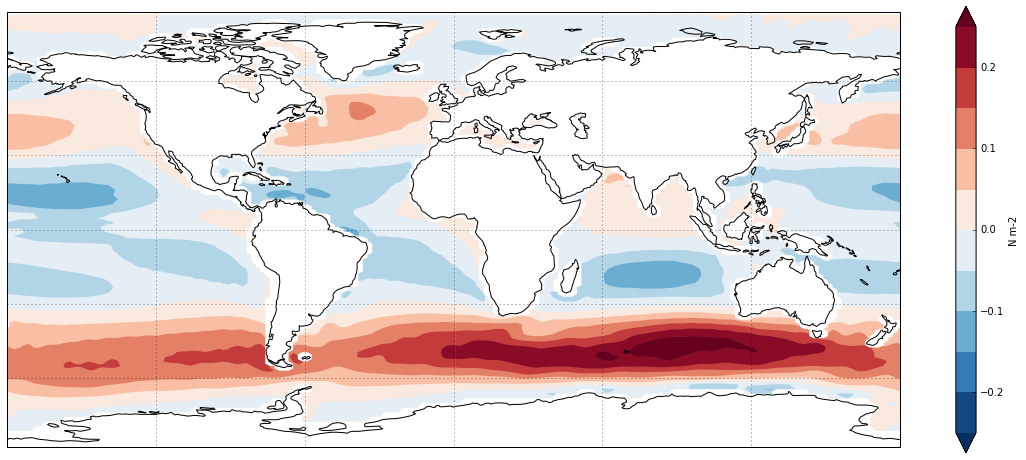

In [8]:
fig = plt.figure(figsize=[20,8])
iplt.contourf(start_clim, cmap='RdBu_r',
              levels=[-0.25, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25],
              extend='both')
plt.gca().coastlines()
plt.gca().gridlines()
cbar = plt.colorbar()
cbar.set_label(str(start_clim.units))
plt.show()

In [9]:
with iris.FUTURE.context(cell_datetime_objects=True):
    end_cube = cube.extract(get_time_constraint(['2081-01-01', '2100-12-31']))
    end_clim = end_cube.collapsed('time', iris.analysis.MEAN)

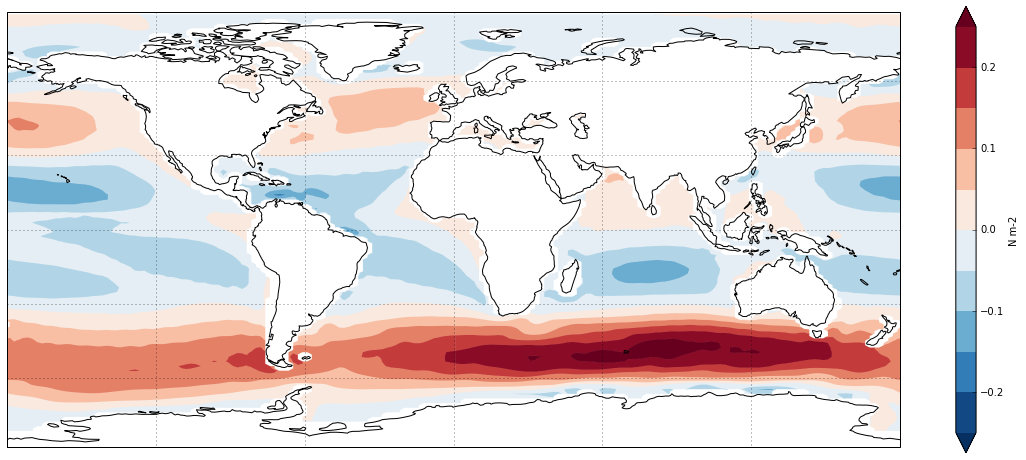

In [10]:
fig = plt.figure(figsize=[20,8])
iplt.contourf(end_clim, cmap='RdBu_r',
              levels=[-0.25, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.20, 0.25],
              extend='both')
plt.gca().coastlines()
plt.gca().gridlines()
cbar = plt.colorbar()
cbar.set_label(str(end_clim.units))
plt.show()

## Metrics

In [11]:
iris.coord_categorisation.add_year(cube, 'time')
annual_cube = cube.aggregated_by(['year'], iris.analysis.MEAN)

In [12]:
zonal_mean = annual_cube.collapsed('longitude', iris.analysis.MEAN)

In [13]:
print(zonal_mean)

surface_downward_x_stress / (N m-2) (time: 95; latitude: 189)
     Dimension coordinates:
          time                           x             -
          latitude                       -             x
     Auxiliary coordinates:
          year                           x             -
     Scalar coordinates:
          longitude: 180.0 degrees, bound=(0.0, 360.0) degrees
     Attributes:
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          branch_time: 56940.0
          cmor_version: 2.6.0
          comment: Data is stored on the native atmosphere grid on which the data was generated....
          contact: Project leaders: Stephen Jeffrey (Stephen.Jeffrey@qld.gov.au) & Leon Rotstayn...
          creation_date: 2011-08-10T00:12:17Z
          experiment: RCP8.5
          experiment_id: rcp85
          forcing: Ant,Nat (RCP 8.5)
          frequency: mon
          history: 2011-08-10T00:12:17Z alter

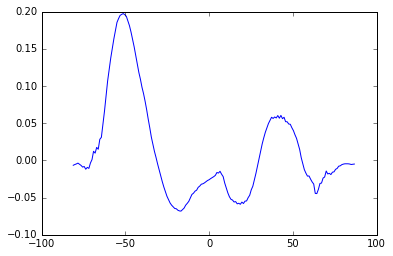

In [14]:
iplt.plot(zonal_mean[0, :])
plt.show()

In [15]:
y_data = zonal_mean[0, :].data
x_data = zonal_mean.coord('latitude').points

In [16]:
y_data

masked_array(data = [-- -- -- -- -- -- -- -0.006551775104728424 -0.005541126638288713
 -0.004716499098059204 -0.0036458040121942763 -0.005217424500277083
 -0.006729313382404106 -0.008996990504480589 -0.008189787629932638
 -0.011837010223196068 -0.009373870737041639 -0.01074861755740701
 -0.0035064355223713545 0.0010544152770454837 0.01224527168024946
 0.009799698651905227 0.017479358189221885 0.01497612709198335
 0.028343743124713928 0.03099885235361532 0.048601896426520554
 0.06619185684798544 0.08640515377434592 0.10663223535650306
 0.12209048414499395 0.13752565362180272 0.15045190612889
 0.16336677968502045 0.17447761868042921 0.1855270981368144
 0.19055650350031794 0.1948954338300313 0.19626948739465422
 0.1973352813592521 0.1958945153755099 0.19365096446258803
 0.18748714978044684 0.18099337075164612 0.1724175637776869
 0.16273734683467858 0.15260626042718853 0.14103220541620515
 0.13003971792577146 0.11825289924939474 0.10921708448381906
 0.098411172607821 0.08985287337076096 0.

In [17]:
x_data

array([ -8.77126160e+01,  -8.67669220e+01,  -8.58273010e+01,
        -8.48901672e+01,  -8.39544754e+01,  -8.30195847e+01,
        -8.20852280e+01,  -8.11512222e+01,  -8.02174835e+01,
        -7.92839279e+01,  -7.83505325e+01,  -7.74172440e+01,
        -7.64840317e+01,  -7.55508881e+01,  -7.46178207e+01,
        -7.36847916e+01,  -7.27518005e+01,  -7.18188400e+01,
        -7.08859253e+01,  -6.99530182e+01,  -6.90201492e+01,
        -6.80872955e+01,  -6.71544495e+01,  -6.62216187e+01,
        -6.52888107e+01,  -6.43560028e+01,  -6.34232140e+01,
        -6.24904366e+01,  -6.15576668e+01,  -6.06248932e+01,
        -5.96921425e+01,  -5.87593918e+01,  -5.78266449e+01,
        -5.68939018e+01,  -5.59611702e+01,  -5.50284386e+01,
        -5.40957069e+01,  -5.31629868e+01,  -5.22302628e+01,
        -5.12975426e+01,  -5.03648262e+01,  -4.94321175e+01,
        -4.84994087e+01,  -4.75667000e+01,  -4.66339951e+01,
        -4.57012901e+01,  -4.47685928e+01,  -4.38358917e+01,
        -4.29031982e+01,

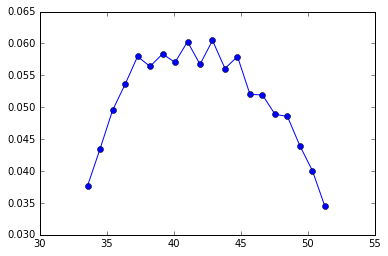

In [18]:
plt.plot(x_data[130:150], y_data[130:150], 'o-')

In [19]:
from scipy.interpolate import interp1d

In [20]:
#xnew = numpy.linspace(x_data[0], x_data[-1], num=1000, endpoint=True)
f_data = interp1d(x_data, y_data, kind='cubic')

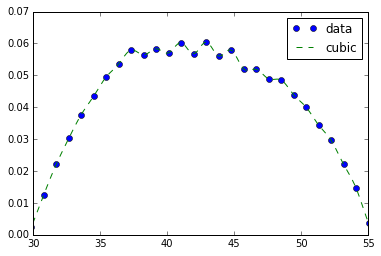

In [25]:
xnew = numpy.linspace(x_data[0], x_data[-1], num=1000, endpoint=True)
ynew =  f_data(xnew)
plt.plot(x_data, y_data, 'o', xnew, ynew, '--')
plt.legend(['data', 'cubic'], loc='best')
plt.xlim(30, 55)
plt.ylim(0, 0.07)
plt.show()

Interpolation still noisy... need to fit a smooth curve instead.

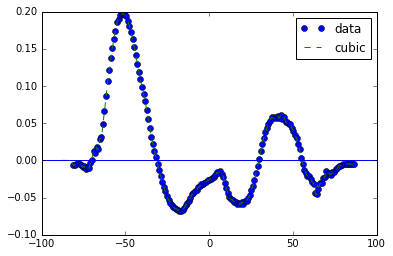

In [28]:
xnew = numpy.linspace(x_data[0], x_data[-1], num=1000, endpoint=True)
ynew =  f_data(xnew)
plt.plot(x_data, y_data, 'o', xnew, ynew, '--')
plt.legend(['data', 'cubic'], loc='best')
plt.axhline()
plt.show()

In [29]:
type(ynew)

numpy.ndarray

In [41]:
def wind_stress_metrics(xdata, ydata, hemisphere, direction):
    """Calculate location and magnitude metric for surface wind stress."""

    assert hemisphere in ['nh', 'sh']
    assert direction in ['westerly', 'easterly']
    
    # assert regularly spaced y values
    
    if (hemisphere == 'sh') and (direction == 'westerly'):
        print(hemisphere, direction)
        selection = (xdata < 0) & (ydata > 0)
    elif (hemisphere == 'nh') and (direction == 'westerly'):
        print(hemisphere, direction)
        selection = (xdata > 0) & (ydata > 0)
    elif (hemisphere == 'sh') and (direction == 'easterly'):
        print(hemisphere, direction)
        selection = (xdata < 0) & (xdata > -50) & (ydata < 0)
    elif (hemisphere == 'nh') and (direction == 'easterly'):
        print(hemisphere, direction)
        selection = (xdata > 0) & (xdata < 40) & (ydata < 0)
    
    x_filtered = numpy.where(selection, xdata, 0)
    y_filtered = numpy.where(selection, ydata, 0)

    location = numpy.sum(x_filtered * y_filtered) / numpy.sum(y_filtered)  # centre of gravity
    magnitude = numpy.sum(y_filtered)
    
    return location, magnitude

The centre of mass/gravity idea came from [this post](http://ifcuriousthenlearn.com/blog/2015/06/18/center-of-mass/).

In [46]:
sw_loc, sw_mag = wind_stress_metrics(xnew, ynew, 'sh', 'westerly')
print(sw_loc, sw_mag)

sh westerly
-50.3229779891 23.290907155


In [47]:
nw_loc, nw_mag = wind_stress_metrics(xnew, ynew, 'nh', 'westerly')
print(nw_loc, nw_mag)

nh westerly
42.282506229 6.17450790211


In [48]:
se_loc, se_mag = wind_stress_metrics(xnew, ynew, 'sh', 'easterly')
print(se_loc, se_mag)

sh easterly
-15.7698587734 -8.04785156934


In [49]:
ne_loc, ne_mag = wind_stress_metrics(xnew, ynew, 'nh', 'easterly')
print(ne_loc, ne_mag)

nh easterly
16.0609242543 -6.31035344801


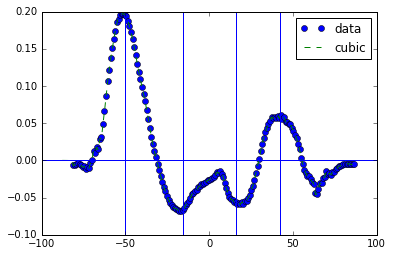

In [51]:
xnew = numpy.linspace(x_data[0], x_data[-1], num=1000, endpoint=True)
ynew =  f_data(xnew)
plt.plot(x_data, y_data, 'o', xnew, ynew, '--')
plt.legend(['data', 'cubic'], loc='best')
plt.axhline()
plt.axvline(sw_loc)
plt.axvline(nw_loc)
plt.axvline(se_loc)
plt.axvline(ne_loc)
plt.show()